<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Case Study </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px">
This machine learning task uses the agricultural dataset of Rajasthan, India, covering the years 2018-2019. The dataset consists of four CSV files: Crop_Production_Data.csv, Water_Usage_Data.csv, Soil_Analysis_Data.csv, and Crop_Price_Data.csv. Each of these files contains information about crop production, water use, soil analysis, and crop prices.<br><br>
The objective of this starter notebook is to create a machine learning model that can predict crop prices based on various agricultural factors. It follows a step-by-step approach that includes <b>data preprocessing, feature engineering, exploratory data analysis (EDA), model selection, hyperparameter tuning, feature importance analysis, model interpretation, and providing recommendations.</b><br><br></div>

<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 1. Data Preprocessing</div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn import set_config
set_config(display='diagram')
import tqdm
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Loading the CSV files    </div>

In [2]:
crop_production_df = pd.read_csv('/kaggle/input/agricultural-data-for-rajasthan-india-2018-2019/crop_production_data.csv')
water_usage_df = pd.read_csv('/kaggle/input/agricultural-data-for-rajasthan-india-2018-2019/water_usage_data.csv')
soil_analysis_df = pd.read_csv('/kaggle/input/agricultural-data-for-rajasthan-india-2018-2019/soil_analysis_data.csv')
crop_price_df = pd.read_csv('/kaggle/input/agricultural-data-for-rajasthan-india-2018-2019/crop_price_data.csv')


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Merging the datasets based on common columns    </div>

In [3]:
merged_df = crop_production_df.merge(water_usage_df, on=['District', 'Crop'])
merged_df = merged_df.merge(soil_analysis_df, on=['District'])  
merged_df = merged_df.merge(crop_price_df, on=['District', 'Crop'])



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Dropping irrelevant columns or cols with high cardinality    </div>

In [4]:
merged_df.drop(['District', 'Crop', 'Market', 'Date'], axis=1, inplace=True)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Dropping duplicates from the merged dataset    </div>

In [5]:
merged_df.drop_duplicates(inplace=True)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Displaying merged_df and getting some insights from it    </div>

In [6]:
merged_df

,Season,Area (hectares),Yield (quintals),Production (metric tons),Irrigation Method,Water Consumption (liters/hectare),Water Availability (liters/hectare),Soil Type,pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Price (INR/quintal)
0,Kharif,16490.142459,30.691986,5061.152230,Sprinkler Irrigation,9738.809833,10557.488279,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,2594.820361
1,Kharif,16490.142459,30.691986,5061.152230,Sprinkler Irrigation,9738.809833,10557.488279,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,2947.041257
2,Kharif,16490.142459,30.691986,5061.152230,Sprinkler Irrigation,9738.809833,10557.488279,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,2820.399333
3,Kharif,16490.142459,30.691986,5061.152230,Sprinkler Irrigation,9738.809833,10557.488279,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,1969.582984
4,Kharif,16490.142459,30.691986,5061.152230,Sprinkler Irrigation,9738.809833,10557.488279,Sandy,7.453182,2.662898,23.564182,13.014409,37.082003,2687.057740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055247,Kharif,16967.702330,42.402728,7194.768632,Drip Irrigation,11927.850413,11650.678989,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,2267.719023
9055248,Kharif,16967.702330,42.402728,7194.768632,Drip Irrigation,11927.850413,11650.678989,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,2966.284732
9055249,Kharif,16967.702330,42.402728,7194.768632,Drip Irrigation,11927.850413,11650.678989,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,2428.806330
9055250,Kharif,16967.702330,42.402728,7194.768632,Drip Irrigation,11927.850413,11650.678989,Chalky (Calcareous),7.079614,2.110315,28.239561,21.623791,42.902838,2749.883633



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
    <b> Insights </b>: There are several rows above with same values in all columns except Price that indicate that the dataset contains multiple entries for the same crop, season, district, and other features, but with different prices. There could be various reasons for this variation in prices, such as different market conditions, quality grades, or pricing strategies.</div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Seperating features and target variable </div>

In [7]:
X = merged_df.drop('Price (INR/quintal)', axis=1)
y = merged_df['Price (INR/quintal)']


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 2. Feature Engineering</div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 No additional feature engineering is performed in this.</div>


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 3. Exploratory Data Analysis </div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Descriptive stats </div>

In [8]:
(merged_df.describe())


,Area (hectares),Yield (quintals),Production (metric tons),Water Consumption (liters/hectare),Water Availability (liters/hectare),pH Level,Organic Matter (%),Nitrogen Content (kg/ha),Phosphorus Content (kg/ha),Potassium Content (kg/ha),Price (INR/quintal)
count,9.055252e+06,9.055252e+06,9.055252e+06,9.055252e+06,9.055252e+06,9.055252e+06,9.055252e+06,9.055252e+06,9.055252e+06,9.055252e+06,9.055252e+06
mean,1.508939e+04,3.767617e+01,5.685255e+03,1.050657e+04,1.048652e+04,7.497677e+00,1.992364e+00,2.989825e+01,1.973011e+01,3.989671e+01,2.500472e+03
std,2.781033e+03,8.270271e+00,1.638171e+03,2.848033e+03,2.925668e+03,5.149368e-01,5.176657e-01,5.193390e+00,5.054560e+00,4.862475e+00,2.969981e+02
min,5.276198e+03,2.027294e+01,1.728446e+03,4.673530e+03,4.505257e+03,5.889492e+00,1.558174e-01,1.199457e+01,4.961838e+00,2.411648e+01,1.323280e+03
25%,1.318315e+04,3.101229e+01,4.491575e+03,8.163200e+03,8.109719e+03,7.159913e+00,1.632442e+00,2.622104e+01,1.620515e+01,3.671655e+01,2.302458e+03
50%,1.518069e+04,3.719335e+01,5.571835e+03,1.029296e+04,1.038500e+04,7.506250e+00,1.979354e+00,2.986308e+01,1.992951e+01,3.980629e+01,2.501839e+03
75%,1.703378e+04,4.401697e+01,6.766723e+03,1.271125e+04,1.291489e+04,7.847932e+00,2.350350e+00,3.326165e+01,2.309869e+01,4.340110e+01,2.702029e+03
max,2.000000e+04,6.042919e+01,1.083453e+04,1.863109e+04,1.848917e+04,9.038430e+00,3.764528e+00,4.576028e+01,3.558841e+01,5.467829e+01,3.513330e+03



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Plotting correlation heatmap </div>

/tmp/ipykernel_28/4059638249.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')


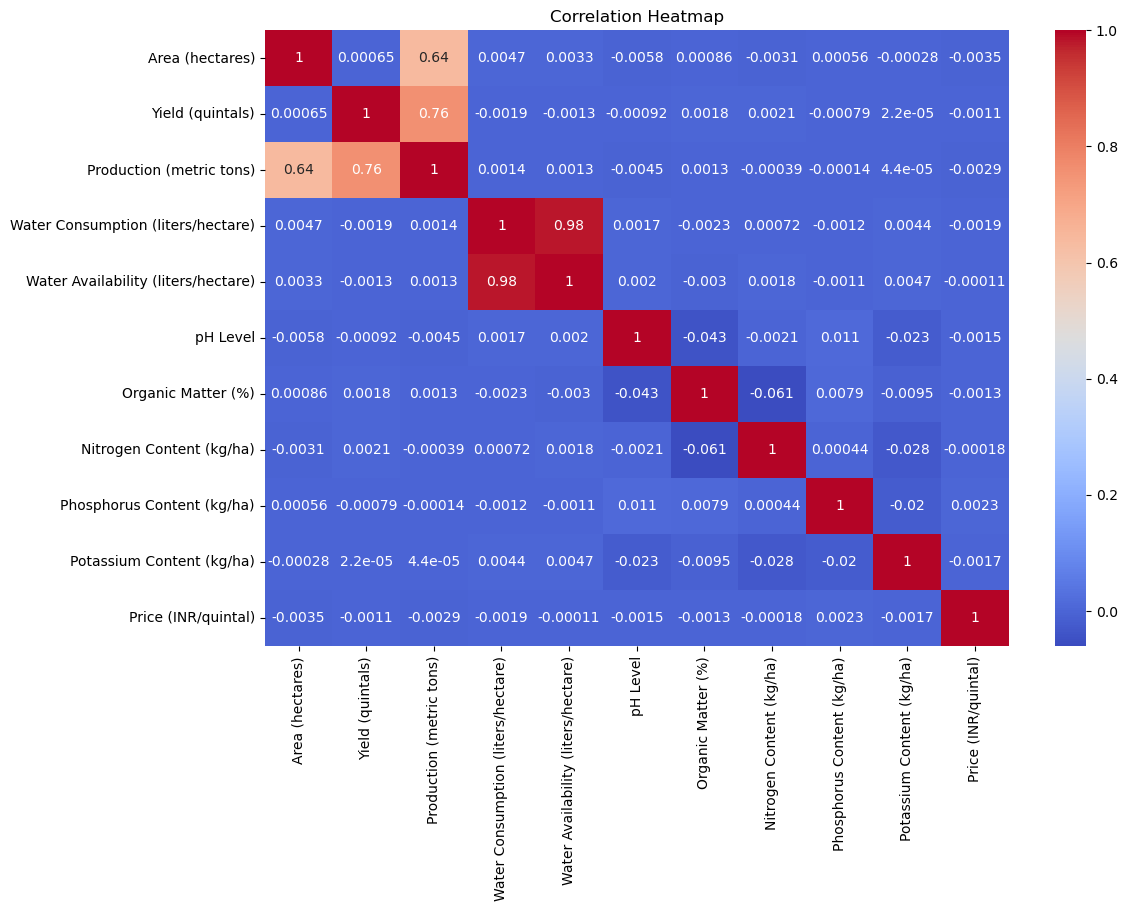

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Plotting pairwise scatter plot for top 5 correlated features </div>

/tmp/ipykernel_28/3869859199.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_numerical_columns = merged_df.corr()['Price (INR/quintal)'].abs().nlargest(6).index[1:]
Plotting Pairwise Scatter Plot: 100%|██████████| 25/25 [00:08<00:00,  2.82it/s]


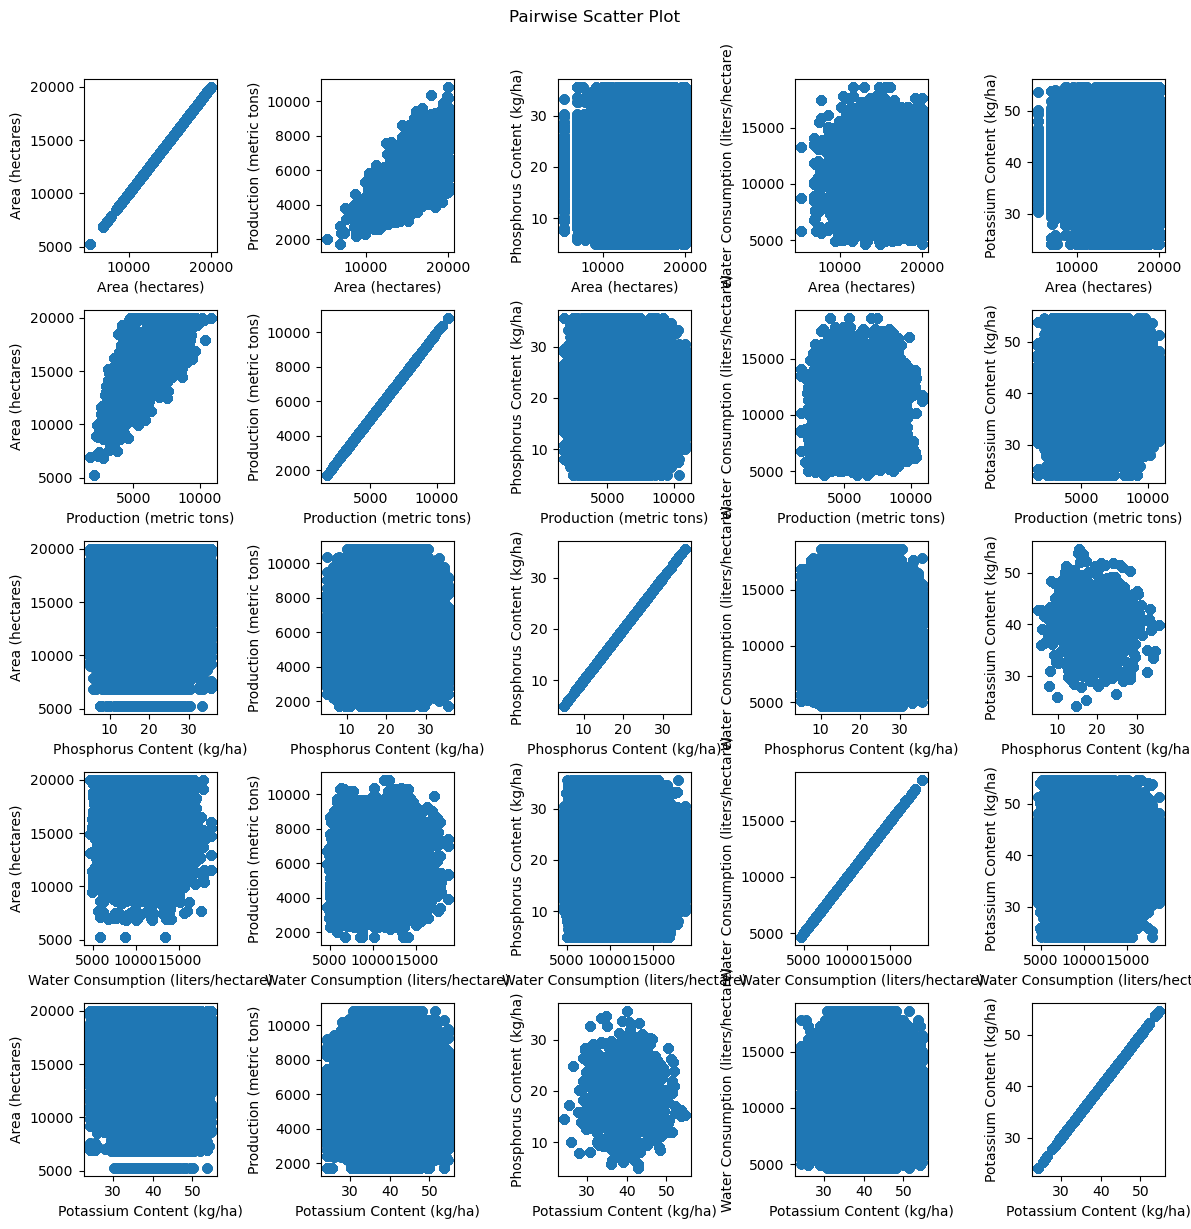

In [10]:
numerical_columns = merged_df.select_dtypes(include=[np.number]).columns

# Get the top 5 numerical columns with highest correlation with the target variable
top_numerical_columns = merged_df.corr()['Price (INR/quintal)'].abs().nlargest(6).index[1:]

# Get the number of numerical columns
num_cols = len(top_numerical_columns)

# Define the number of rows and columns for the subplots
n_rows = n_cols = num_cols

# Create a progress bar using tqdm
with tqdm.tqdm(total=num_cols**2, desc="Plotting Pairwise Scatter Plot") as pbar:
    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 12))
    fig.suptitle('Pairwise Scatter Plot', y=1.02)

    # Iterate over each pair of numerical columns
    for i, col1 in enumerate(top_numerical_columns):
        for j, col2 in enumerate(top_numerical_columns):
            # Plot the scatter plot for the current pair of columns
            axes[i, j].scatter(merged_df[col1], merged_df[col2])
            axes[i, j].set_xlabel(col1)
            axes[i, j].set_ylabel(col2)
            pbar.update()

    # Adjust the spacing between subplots
    plt.tight_layout()

# Display the plot
plt.show()



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Top correlated features with crop prices </div>

In [11]:
top_correlated_features = merged_df.corr()['Price (INR/quintal)'].sort_values(ascending=False)[1:4].index.tolist()
print("Top correlated features with crop prices:")
for feature in top_correlated_features:
    print("- ", feature)


/tmp/ipykernel_28/4061371391.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_correlated_features = merged_df.corr()['Price (INR/quintal)'].sort_values(ascending=False)[1:4].index.tolist()


Top correlated features with crop prices:
-  Phosphorus Content (kg/ha)
-  Water Availability (liters/hectare)
-  Nitrogen Content (kg/ha)



<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Distribution of crop prices
</div>

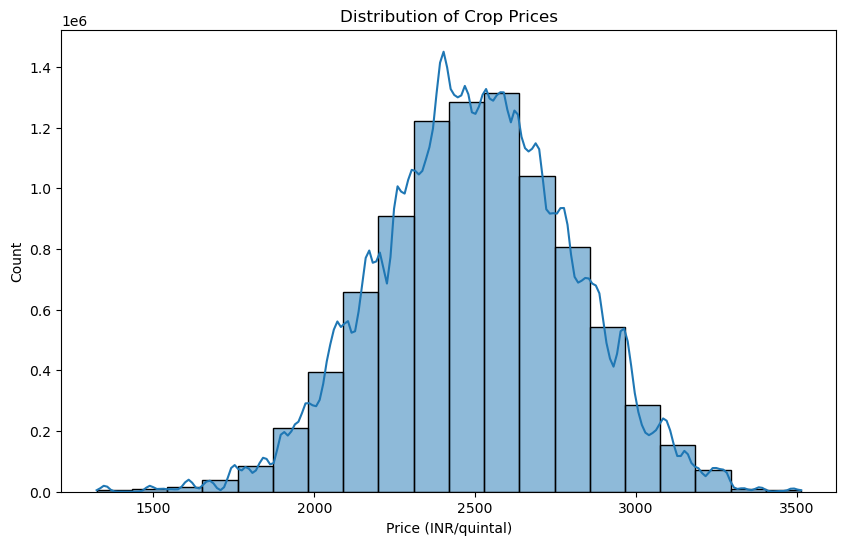

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='Price (INR/quintal)', bins=20, kde=True)
plt.title('Distribution of Crop Prices')
plt.xlabel('Price (INR/quintal)')
plt.ylabel('Count')
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Average crop prices by soil type </div>


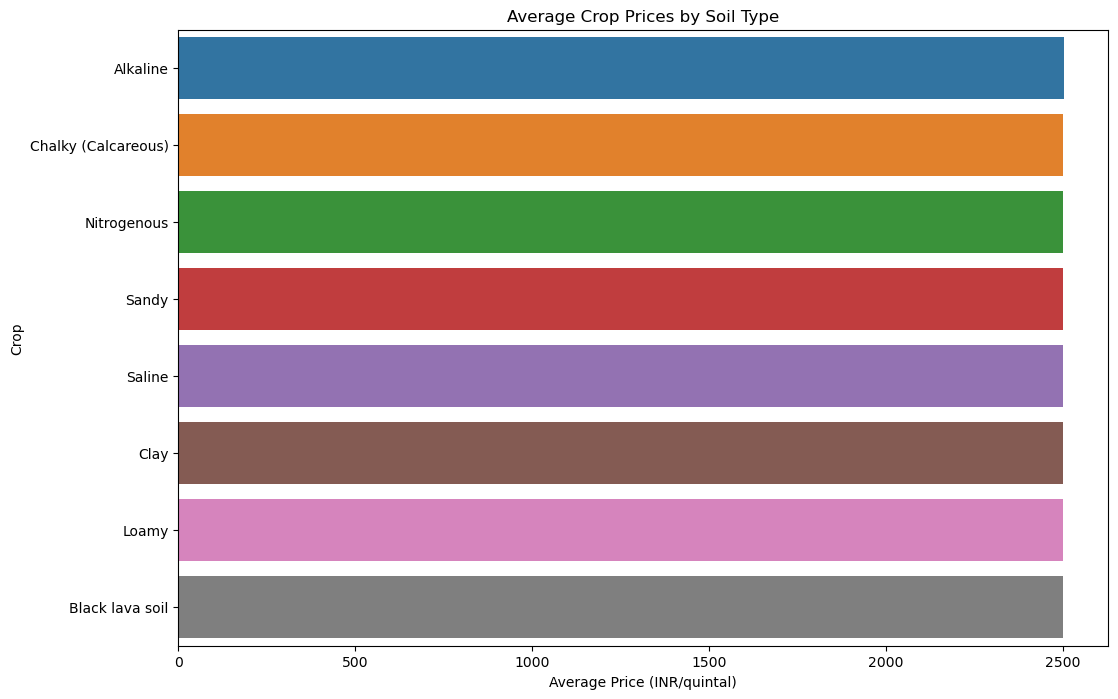

In [13]:
average_prices = merged_df.groupby('Soil Type')['Price (INR/quintal)'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_prices.values, y=average_prices.index)
plt.title('Average Crop Prices by Soil Type')
plt.xlabel('Average Price (INR/quintal)')
plt.ylabel('Crop')
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Scatter plot of crop prices vs. water usage </div>


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


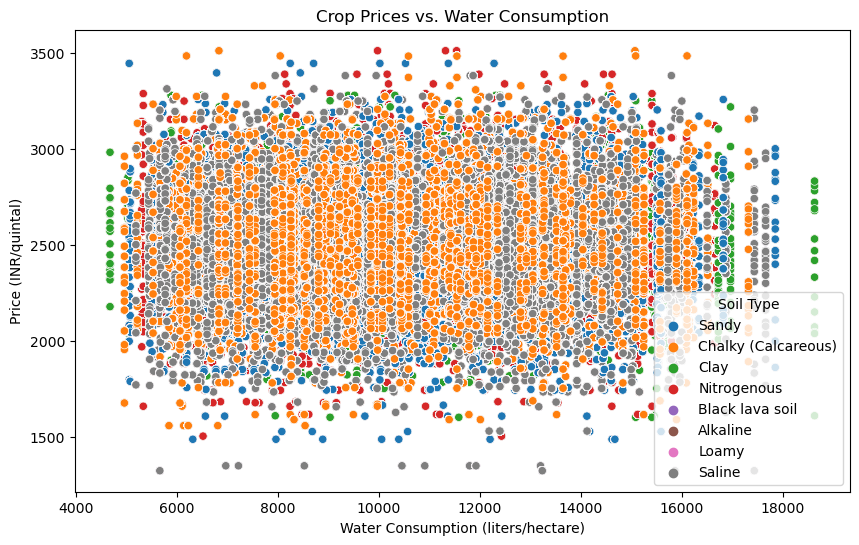

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Water Consumption (liters/hectare)', y='Price (INR/quintal)', hue='Soil Type')
plt.title('Crop Prices vs. Water Consumption')
plt.xlabel('Water Consumption (liters/hectare)')
plt.ylabel('Price (INR/quintal)')
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Scatter plot of crop prices vs. nitrogen content </div>



In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Nitrogen Content (kg/ha)', y='Price (INR/quintal)', hue='Soil Type',)
plt.title('Crop Prices vs. Nitrogen Content')
plt.xlabel('Nitrogen Content (kg/ha)')
plt.ylabel('Price (INR/quintal)')
plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


 
<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌Scatter plot of crop prices vs. pH level


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='pH Level', y='Price (INR/quintal)', hue='Soil Type',)
plt.title('Crop Prices vs. pH Level')
plt.xlabel('pH Level')
plt.ylabel('Price (INR/quintal)')
plt.show()




<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Scatter plot of crop prices vs. water availability </div>

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Water Availability (liters/hectare)', y='Price (INR/quintal)', hue='Soil Type')
plt.title('Crop Prices vs. Water Availability')
plt.xlabel('Water Availability (liters/hectare)')
plt.ylabel('Price (INR/quintal)')
plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌  Scatter plot of crop prices vs. yield </div>


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Yield (quintals)', y='Price (INR/quintal)', hue='Soil Type')
plt.title('Crop Prices vs. Yield')
plt.xlabel('Yield (quintals)')
plt.ylabel('Price (INR/quintal)')
plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌  Scatter plot of crop prices vs. market supply </div>


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Production (metric tons)', y='Price (INR/quintal)', hue='Soil Type')
plt.title('Crop Prices vs. Production')
plt.xlabel('Production (metric tons)')
plt.ylabel('Price (INR/quintal)')
plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌  Scatter plot of crop prices vs. total area harvested </div>


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Total Area Harvested (ha)', y='Price (INR/quintal)', hue='Soil Type')
plt.title('Crop Prices vs. Total Area Harvested')
plt.xlabel('Total Area Harvested (ha)')
plt.ylabel('Price (INR/quintal)')
plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌  Scatter plot of crop prices vs. total production </div>


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Production (metric tons)', y='Price (INR/quintal)', hue='Soil Type')
plt.title('Crop Prices vs. Total Production')
plt.xlabel('Production (metric tons)')
plt.ylabel('Price (INR/quintal)')
plt.show()

<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 4. Model Selection with Hyperparameter Tuning</div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Splitting the data into train and test sets </div>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Defining the column transformer and processing the categorical columns </div>

In [21]:
# Specify the columns that need one-hot encoding
categorical_columns = ['Season', 'Soil Type','Irrigation Method']

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

In [22]:
# Apply the preprocessor to transform the data
X_train_encoded = preprocessor.fit_transform(X_train)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Defining the pipeline with scaling and random forest regressor </div>

In [23]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Defining the hyperparameters to tune </div>

In [30]:
# Define the hyperparameters to tune
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 5, 10],
    'regressor__min_samples_split': [2, 5, 10]
}

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Performing grid search for hyperparameter tuning </div>

In [31]:
# Now you can proceed with the GridSearchCV using the encoded data
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)
grid_search.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 5, 10],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=3)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Fetching the best model from grid search </div>

In [32]:
best_model = grid_search.best_estimator_


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 5. Feature Importances</div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Calculating and visualizing feature importances </div>

In [33]:
importances = best_model.named_steps['regressor'].feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

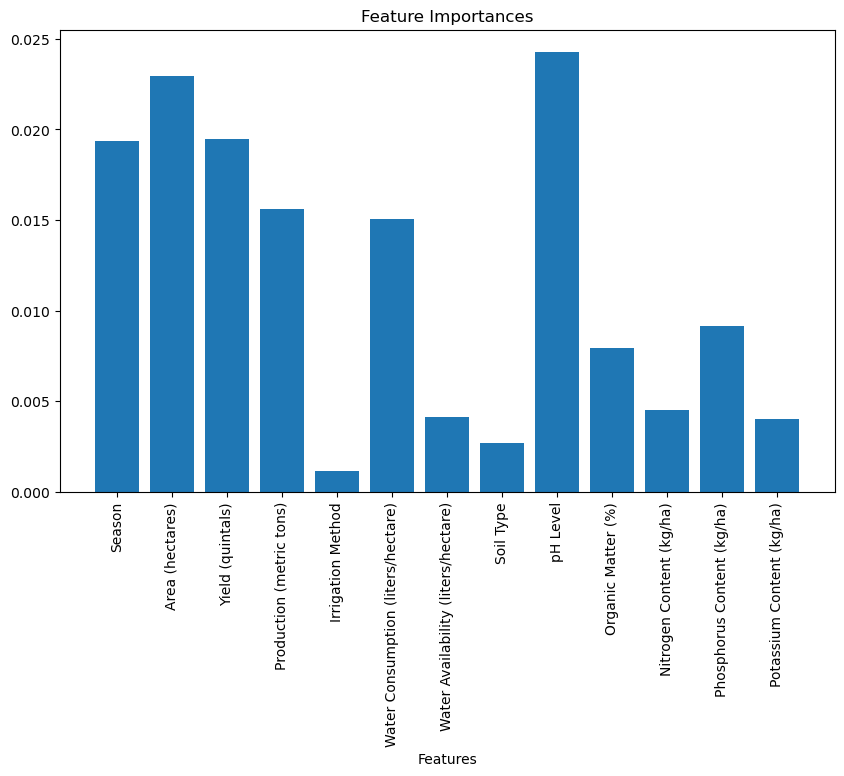

In [38]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')

# Adjust the range to plot only the desired number of features
plt.bar(range(len(feature_names)), importances[:len(feature_names)], align='center')

plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel('Features')

plt.show()


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 6. Model Interpretation</div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌  Use permutation importance to interpret the model </div>


In [41]:
# Apply the preprocessor to transform the data
X_test_encoded = preprocessor.fit_transform(X_test)

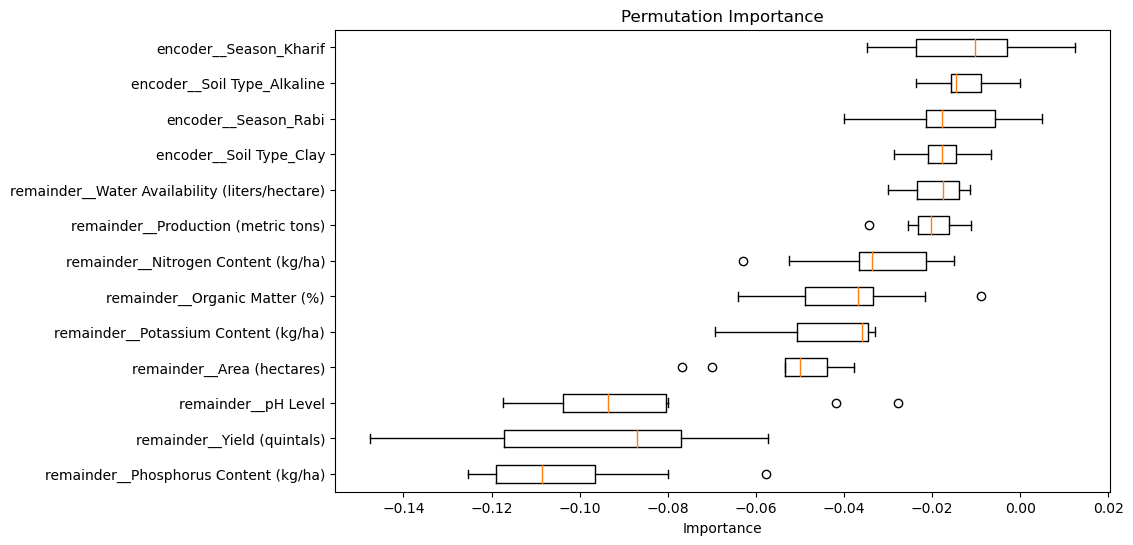

In [51]:
# Apply the preprocessor to transform the data
X_train_encoded = preprocessor.fit_transform(X_train)

perm_importance = permutation_importance(best_model, X_train_encoded, y_test, n_repeats=10, random_state=42)

plt.figure(figsize=(10, 6))
sorted_idx = perm_importance.importances_mean.argsort()

# Use the original column names from the preprocessor
column_labels = preprocessor.get_feature_names_out()[sorted_idx[:13]]

plt.boxplot(perm_importance.importances[sorted_idx[:13]].T, vert=False, labels=column_labels)
plt.title('Permutation Importance')
plt.xlabel('Importance')
plt.show()


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 7. Predictions </div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Generating predictions on the test set and evaluating its performance </div>

In [53]:
y_pred = best_model.predict(X_test_encoded)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("R2 Score: {:.2f}".format(r2))


Mean Squared Error: 94298.97
R2 Score: -0.07


<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px"> 8. Recommendations </div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Arial; padding:10px; border: 5px solid #19180F; border-radius:10px">
1. pH Level: Given that pH level is the most important feature, it is crucial to pay attention to the acidity or alkalinity of the soil. Conduct regular soil testing to monitor the pH level and take necessary actions to adjust it if needed. Different crops have specific pH requirements, so ensure that the pH level of the soil is suitable for the crops you are cultivating.<br><br>
2. Area (hectares): The area of the land used for cultivation is an important factor. Evaluate the available land and consider optimizing its usage. If feasible, explore possibilities of expanding the cultivated area to increase production. However, also ensure that the additional land is suitable for cultivation and does not compromise the quality of the existing land.<br><br>
3. Yield (quintals): Focus on improving the yield of your crops. Implement effective agricultural practices, such as proper irrigation, fertilization, and pest control, to maximize the yield. Stay updated with the latest research and advancements in agricultural techniques that can help enhance crop productivity.<br><br>
4. Season: Consider the impact of different seasons on crop growth and adapt your farming practices accordingly. Understand the specific requirements and challenges associated with each season and adjust your planting and harvesting schedules, irrigation methods, and crop selection to optimize productivity.<br><br>
5. Production (metric tons): Pay attention to the overall production of your crops. Regularly monitor and analyze production data to identify any trends or patterns. This information can help you make informed decisions regarding crop selection, resource allocation, and production strategies. Seek opportunities to increase production by implementing efficient farming techniques and utilizing available resources effectively.<br><br></div>


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌 Generating recommended crops to focus on for higher prices </div>

In [56]:
recommended_soils = X_train['Soil Type'].value_counts().nlargest(3).index.tolist()
print("Recommended Soil Type to focus on for higher prices:")
for soil in recommended_soils:
    print("- ", soil)

Recommended Soil Type to focus on for higher prices:
-  Black lava soil
-  Saline
-  Clay
